In [41]:
import numpy as np

REINFORCE_returns = [np.load(f'logs/returns_REINFORCE_{i}.npy').item()['returns'] for i in range(10)]
AC_returns = [np.load(f'logs/returns_ActorCritic_{i}.npy').item()['returns'] for i in range(10)]
A2C_returns = [np.load(f'logs/returns_A2CAgent_{i}.npy').item()['returns'] for i in range(10)]

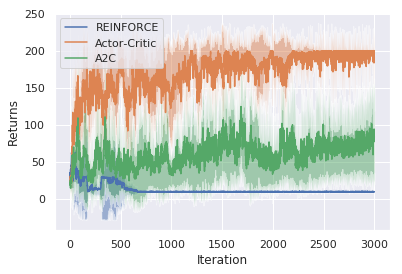

In [42]:
from lagom.core.plotter import CurvePlot

plot = CurvePlot()
plot.add('REINFORCE', REINFORCE_returns)
plot.add('Actor-Critic', AC_returns)
plot.add('A2C', A2C_returns)
ax = plot(xlabel='Iteration', ylabel='Returns')
ax.figure.savefig('logs/result.png')

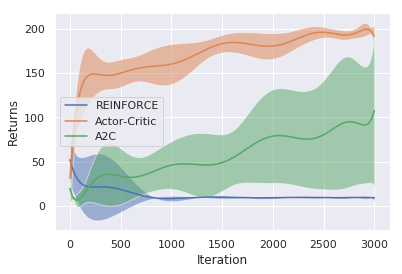

In [37]:
from lagom.core.transform import PolySmooth

smooth = PolySmooth()

REINFORCE_returns = [smooth(d) for d in REINFORCE_returns]
AC_returns = [smooth(d) for d in AC_returns]
A2C_returns = [smooth(d) for d in A2C_returns]

plot = CurvePlot()
plot.add('REINFORCE', REINFORCE_returns)
plot.add('Actor-Critic', AC_returns)
plot.add('A2C', A2C_returns)
ax = plot(xlabel='Iteration', ylabel='Returns')

In [46]:
def discount_with_dones(rewards, dones, gamma):
    discounted = []
    r = 0
    for reward, done in zip(rewards[::-1], dones[::-1]):
        r = reward + gamma*r*(1.-done) # fixed off by one bug
        discounted.append(r)
    return discounted[::-1]

In [55]:
discount_with_dones([1, 2, 3, 4, 5, 6], [False, False, True, False, False, False], 0.1)

[1.23, 2.3, 3.0, 4.56, 5.6, 6.0]

In [54]:
AssertionError

array([0, 1, 1])